# Linear Regression and Correlation

## Challenge 1

You are the owner of a big company and you suspect that the younger your employees are, the most likely it is that they don't come to work. In order to prove this hypothesis, you have gathered some data:

| EmployeeID | Age | Absences |
|--------|-----|------------|
| 1      | 27  | 15         |
| 2      | 61  | 6          |
| 3      | 37  | 10         |
| 4      | 23  | 18         |
| 5      | 46  |  9         |
| 6      | 58  |  7         |
| 7      | 29  | 14         |
| 8      | 36  | 11         |
| 9      | 64  |  5         |
| 10     | 40  |  8         |

You can find this information in the `data` folder of the present repository. 

Import the necessary libraries to complete the lab here:

In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt

#### 1. Plot the scatter chart of `Age` and `Absences`. Comment the result. Do you see any relation between `Age` and `Absences`?

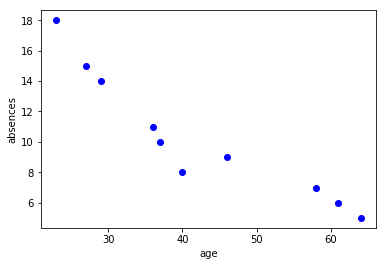

the correlation value between both data is -0.932543409248101


In [2]:
# your code here
data = pd.read_csv('../data/absences.csv')
data

plt.plot(data.Age,data.Absences,'bo')
plt.ylabel('absences')
plt.xlabel('age')

plt.show()

print(f'the correlation value between both data is {data.Age.corr(data.Absences)}')


### We see a clear correlation (negative, and inversaly proportial = -0.93) between the age of the employees and the ratio of absences.

#### 2.- Define a function to calculate the slope and intercept of the regression line for two variables. Your are not allowed to use any functions or methods that directly calculate those parameters.

#### y= mx -x0 .


In [3]:
##the parameters inputs are the list for the absences Y, and ages X.
abse = data.Absences.values.tolist()
ages = data.Age.values.tolist()


def slope(x,y):
    numerator = 0
    denominator = 0
    mu_x = sum(x)/len(x) #mean of x: ages
    mu_y = sum(y)/len(y) #mean of y: absences
    for i,j in zip(x,y):
        numerator += ((j-mu_y)*(i-mu_x))
        denominator += (i-mu_x)**2
    m = numerator/denominator
    return m

m = slope(ages,abse)


def intercept(x,y,slope):
    m = slope(x,y)
    mu_x = sum(x)/len(x)
    mu_y = sum(y)/len(y)
    b = mu_y - m*mu_x
    return b

b = intercept(ages,abse,slope)



In [4]:
print(f'eq is y = {round(m,3)}*x + {round(b,3)}')

eq is y = -0.268*x + 21.587


#### 3.- Use the function you defined in step 2 to calculate the regression line for `Age` and `Absences`. Plot it and comment your results.

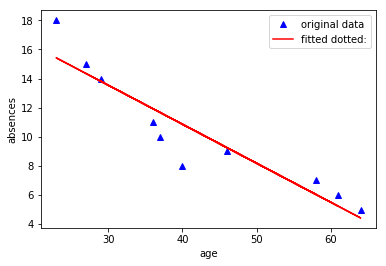

In [5]:
absences_new = m*data.Age +b

plt.plot(data.Age,data.Absences, 'b^', label='original data')
plt.plot(data.Age, b + m*data.Age,'r', label='fitted dotted:')
plt.legend()
plt.ylabel('absences')
plt.xlabel('age')

plt.show()

There a good fit with the original data, but with need to calculate the R-square to know with precission how exact is the fitting.

#### 4.- Define a function to calculate the covariance and the correlation of two variables.

### covariance	${cov}{XY}=\sigma_{XY} = E[(X-\mu _{X})\,(Y-\mu _{Y})]$

### correlation ${corr}_{XY}=\rho _{XY}=E[(X-\mu _{X})\,(Y-\mu _{Y})]/(\sigma _{X}\sigma _{Y})$

### variance $\sigma^2$ = $\sum(X-x_i) \over N$

### mean $\mu = \sum{x \over N}$

In [6]:
def covariance (x,y):
    cov = 0
    mu_x = sum(x)/len(x) #mean of x: ages
    mu_y = sum(y)/len(y) #mean of y: absences
    for i,j in zip(x,y):
        cov += ((i-mu_x)*(j-mu_y))
    cov = cov/len(x)
    return cov
cov_1 = covariance(ages,abse)

#make correlation function independent of covariance. We calculate again the covariance:
def correlation (x,y,covariance):
    cov = covariance(x,y)
    std_x = 0
    std_y = 0
    mu_x = sum(x)/len(x) #mean of x: ages
    mu_y = sum(y)/len(y) #mean of y: absences
    for i,j in zip(x,y):
        std_x += (mu_x - i)**2 
        std_y += (mu_y - j)**2 
    std_x = (std_x)**(1/2)
    std_y = (std_y)**(1/2)  
    corr = cov *len(x)/(std_x*std_y)
    return corr
    
corr_1 = correlation(ages, abse,covariance)


#### 5.- Use the function you defined in step 4 to calculate the covariance and the correlation of `Age` and `Absences`. Compare them and comment.

In [7]:
print(f'''

the covariance is {round(covariance(ages, abse),3)}, the correlation value is {round(correlation(ages, abse,covariance),3)}

''')  



the covariance is -51.93, the correlation value is -0.933




#### 6.- Summarize your results, interpret them and give some insights. Can you confirm that the age is an indicator of absenteeism?

#### The covariance = -51.93 implies the two variables move inversaly dut the sign of it. So then, when employes's age increase the absences of them decreases.

#### The correlation = -0.933 implies two things. First one is the negative sign indicates two variables move with an inverse ratio. The second one, due value is close to 1, there is a high dependence between #absences and age of employes.

## We can summarize that the age is a VERY GOOD indicator of absenteeism.

## Challenge 2

Good Ironhackers stay in campus on Fridays for Ironbeers. You suspect that the more people you tell to stay, the most likely it is that they don't. You want to know if you are the reason why people don't stay so you decide to do an analysis. 

X is the number of people that you told to stay and Y is the number of people that actually stayed.

| X | Y |
|---|---|
| 1 | 1 |
| 3 | 2 |
| 4 | 4 |
| 6 | 4 |
| 8 | 5 |
| 9 | 7 |
| 11 |8 |
| 14 | 9 |

Use the following command to create a dataframe with the data about Ironbeers attendance:

In [8]:
ironbeers_df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,9]})
ironbeers_df

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,9


#### 1.- Calculate the covariance and the correlation of `X` and `Y`. Comment on the results.

In [9]:
X = ironbeers_df.X.values.tolist()
Y = ironbeers_df.Y.values.tolist()

cov_iron = covariance(X,Y)
corr_iron = correlation(X,Y,covariance)

print(f'''

the covariance is {round(cov_iron,3)}, the correlation value is {round(corr_iron,3)}

''')  



the covariance is 10.5, the correlation value is 0.977




### Covariance = 10.5 implies there is a converging movement in the same direction of two variables. It means that number people I invite increase, also the number people stays.

### On the other hand, correlation is almost 1, due to there a strong dependence (linear in this case) between *Y* and *X* parameters.

#### 2.- Plot the scatter chart of `X` and `Y`. Comment on the results.

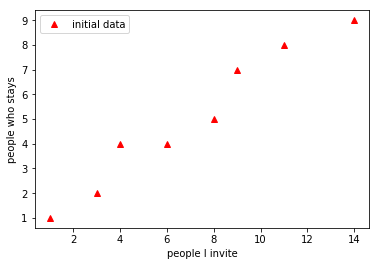

In [11]:
absences_new = m*data.Age +b

plt.plot(X,Y,'r^', label='initial data')
plt.xlabel('people I invite')
plt.ylabel('people who stays')

plt.legend()
plt.show()

#### Graphic shows how as # people is invited increases, people who stays increases but at lower rithm.

#### 3.- Calculate the regression line for `X` and `Y`. Commment on the results.

In [13]:
m_iron = slope(X,Y)
b_iron = intercept(X,Y,slope)
print(m_iron,b_iron)
print(f'eq is y = {round(m_iron,3)}*x + {round(b_iron,3)}')

0.6363636363636364 0.5454545454545459
eq is y = 0.636*x + 0.545


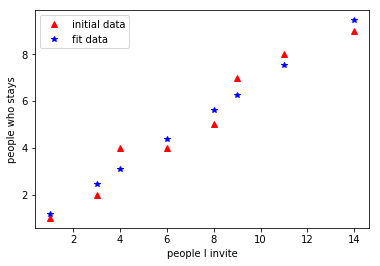

In [49]:
absences_new = m*data.Age +b

plt.plot(X, Y,'r^', label='initial data')
plt.plot(ironbeers_df.X, m_iron*ironbeers_df.X + b_iron,'b*', label='fit data')

plt.xlabel('people I invite')
plt.ylabel('people who stays')

plt.legend()
plt.show()

### Plot shows how there is a good fit between the original data, and the linear regression (slope and intercept terms) calculated.

#### 4.- What is your conclusion? Are you the reason why people is not staying on Fridays?

### There is a clear correlation (0.977) between the people is invited and people who really stays. 

### The slope m = 0.636 shows how the rithm of people really stay is lower than people is invited (the party's owner is a loser) . Just for clarifying a bit better: 

#### if m = 1, it would mean there is the same rithm of people invited and people stayed (the party's owner would be a good public relationships)
#### if m > 1, it would mean the  rithm of people who stays is higher than people invited (the party's owner would be a badass)

## Bonus Challenge: Error Analysis

You are going to do an analysis to check whether two random variables fit into a linear regression or not.

In this challenge, you are asked to do an error analysis using the data in **challenge 2**. An "error" is the difference between the expected value of an observation (the regression line value) and the actual value.

#### 1.- First create a new column `expected_Y` in `ironbeers_df` to store the expected `Y` value for each `X`.
**Hint**: You get the expected `Y` by evaluating the regression line for each `X`.

### Using the regression line (m_iron and b_iron) from the challenge 2 to calculate the value expected

In [17]:
ironbeers_df['expected_Y']= round(ironbeers_df['X']*m_iron + b_iron,0)
ironbeers_df

,X,Y,expected_Y
0,1,1,1.0
1,3,2,2.0
2,4,4,3.0
3,6,4,4.0
4,8,5,6.0
5,9,7,6.0
6,11,8,8.0
7,14,9,9.0


#### 2.- Create a new column `error` in `ironbeers_df` to store the error between the actual and expected values of `Y`. Plot the scatter chart of `X` and `error`.

In [23]:
ironbeers_df['error'] =ironbeers_df['Y'] - ironbeers_df['expected_Y'] 

In [33]:
ironbeers_df

,X,Y,expected_Y,error
0,1,1,1.0,0.0
1,3,2,2.0,0.0
2,4,4,3.0,1.0
3,6,4,4.0,0.0
4,8,5,6.0,-1.0
5,9,7,6.0,1.0
6,11,8,8.0,0.0
7,14,9,9.0,0.0


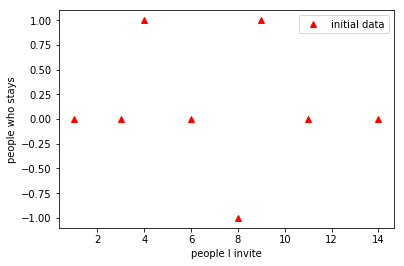

In [39]:
absences_new = m*data.Age +b

#plt.errorbar(ironbeers_df['X'], ironbeers_df['Y'], yerr=ironbeers_df['error'], fmt='b^')

plt.plot(ironbeers_df['X'] ,ironbeers_df['error'] ,'r^', label='initial data')
plt.xlabel('people I invite')
plt.ylabel('people who stays')

plt.legend()
plt.show()

#### 3.- The closer the points to zero, the best the actual values fit the linear regression. Comment the plot above. Do you see any particular points with a high error?

### Yes. There are three X values with an error = $+-1$. Except these three ones data, the rest have a zero error values.

#### 4.- Remove the points with a high error and recalculate the regression line.

In [41]:
new_ironbeers = ironbeers_df.loc[ironbeers_df.error ==0]
new_ironbeers

,X,Y,expected_Y,error
0,1,1,1.0,0.0
1,3,2,2.0,0.0
3,6,4,4.0,0.0
6,11,8,8.0,0.0
7,14,9,9.0,0.0


### Regression line without errors

In [43]:
m_iron_new = slope(new_ironbeers.X,new_ironbeers.Y)
b_iron_new = intercept(new_ironbeers.X,new_ironbeers.Y,slope)
print(f'eq is y = {round(m_iron_new,3)}*x + {round(b_iron_new,3)}')

eq is y = 0.653*x + 0.232


#### 5.- Calculate the correlation. What is happening? Comment the result.

In [50]:
new_X = new_ironbeers.X.values.tolist()
new_Y = new_ironbeers.Y.values.tolist()

cov_iron_new = covariance(new_X,new_Y)
corr_iron_new = correlation(new_X,new_Y,covariance)

print(f'''

the correlation value is {round(corr_iron_new,3)}

''')  



the correlation value is 0.995




### The correlation has increased from 0.977 to 0.995, so it means, there is a better linear regression due to we remove the data who has an error different from zero. 